# **Data Type Constraints**

### **Common data types**

When working with new data, you should always check the data types of your columns using the 
  * `.dtypes` attribute, or 
  * `.info()` method
Often times, you'll run into columns that should be converted to different data types before starting any analysis.

### **Numeric data or ... ?**

You'll be working with bicycle ride sharing data in San Francisco called `ride_sharing`. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The `user_type` column contains information on whether a user is taking a free ride and takes on the following values:

* `1` for free riders.
* `2` for pay per ride.
* `3` for monthly subscribers.

In this instance, you will print the information of `ride_sharing` using `.info()` and see a firsthand example of **how an incorrect data type can flaw your analysis of the dataset.** 

* Print the information of `ride_sharing`.
Use `.describe()` to print the summary statistics of the `user_type` column from `ride_sharing`.



In [ ]:
import pandas as pd

ride_sharing = pd.read_csv("ride_sharing_new.csv", index_col=[0])
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64



The `user_type` column has an finite set of possible values that represent groupings of data, it should be converted to `category`.

* Convert `user_type` into `categorical` by assigning it the `'category'` data type and store it in the `user_type_cat` column.
* Make sure you converted `user_type_cat` correctly by using an `assert` statement.

In [ ]:
import pandas as pd
ride_sharing = pd.read_csv("ride_sharing_new.csv", index_col=[0])

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype("category")

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


### **Summing strings and concatenating numbers**

You'll be converting the string column `duration` to the type `int`. Before that however, you will need to make sure to strip `"minutes"` from the column in order to make sure `pandas` reads it as numerical. 

* Use the `.strip()` method to strip `duration` of `"minutes"` and store it in the `duration_trim `column.
* Convert `duration_trim` to `int` and store it in the `duration_time` column.
* Write an `assert` statement that checks if `duration_time`'s data type is now an `int`.
* Print the average ride duration.

In [ ]:
import pandas as pd
ride_sharing = pd.read_csv("ride_sharing_new.csv", index_col=[0])

# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype(int)

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']].head(3))
print(ride_sharing['duration_time'].mean())

     duration duration_trim  duration_time
0  12 minutes           12              12
1  24 minutes           24              24
2   8 minutes            8               8
11.389052795031056


# **Data range constraints**

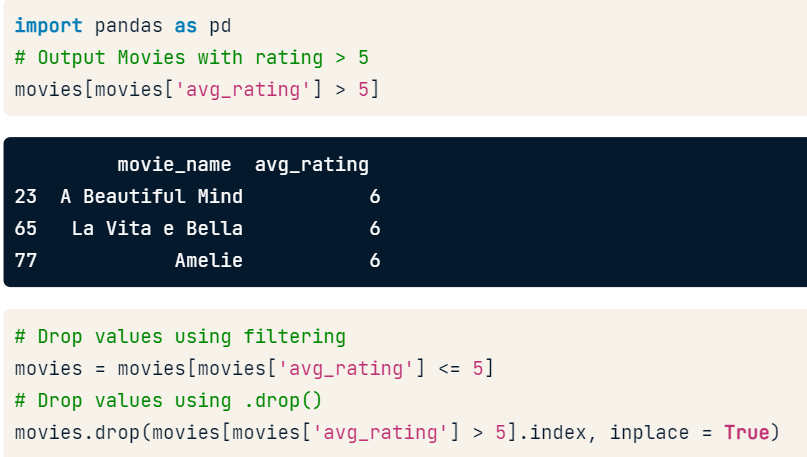

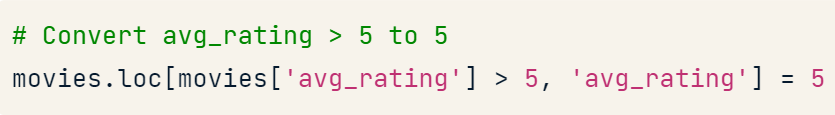

## **Date Range**

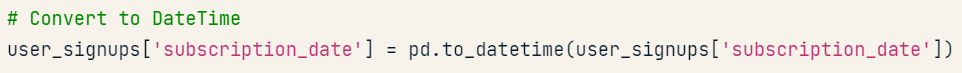


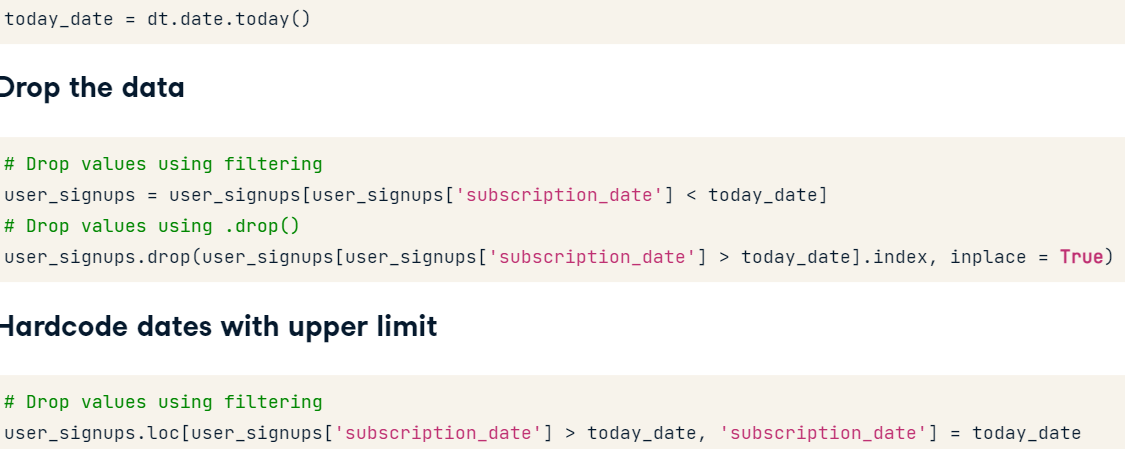

### **Tire size constraints**

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

You will make sure the `tire_sizes` column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

* Convert the `tire_sizes` column from category to `'int'`.
* Use `.loc[]` to set all values of `tire_sizes` above 27 to 27.
* Reconvert back `tire_sizes` to `'category'` from `int`
* Print the description of the `tire_sizes`

In [35]:
import pandas as pd
ride_sharing = pd.read_csv("ride_sharing_new.csv", index_col=[0])

# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing["tire_sizes"] > 27, "tire_sizes"] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype("category")

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      13274
Name: tire_sizes, dtype: int64


You can look at the new maximum by looking at the `top` row in the description. Notice how essential it was to convert `tire_sizes` into integer before setting a new maximum.

### **Back to the future**

* Convert `ride_date` to a `datetime` object and store it in `ride_dt` column using `to_datetime()`.
* Create the variable `today`, which stores today's date by using the `dt.date.today()` function.
* For all instances of `ride_dt `in the future, set them to today's date.
* Print the maximum date in the ride_dt column.

In [63]:
import pandas as pd
import datetime as dt
ride_sharing = pd.read_csv("ride_sharing_new.csv", index_col=[0])

# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.datetime.now()
# For some unknown reason, today = dt.date.today() cannot be used.

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2021-09-14 19:21:15.661115


# **Duplicated values**

* Use `.duplicated()` to find them with the following parameters
  * `subset` to find duplicates only in the specified columns
  * `keep="first", "last"`, `False` to keep only the 1st, the last, or all duplicated values.

## **Complete Duplicates**

  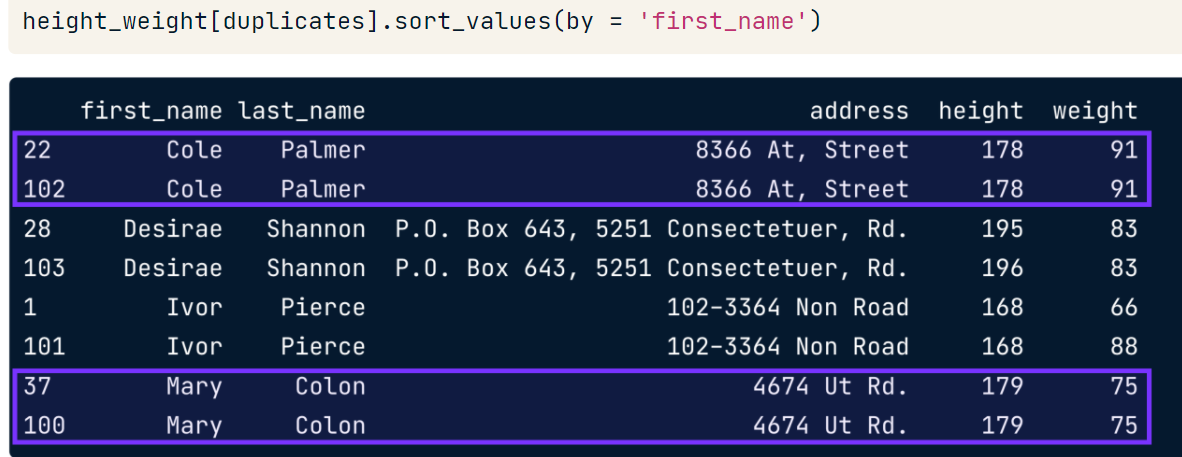

## **Incomplete Duplicates**

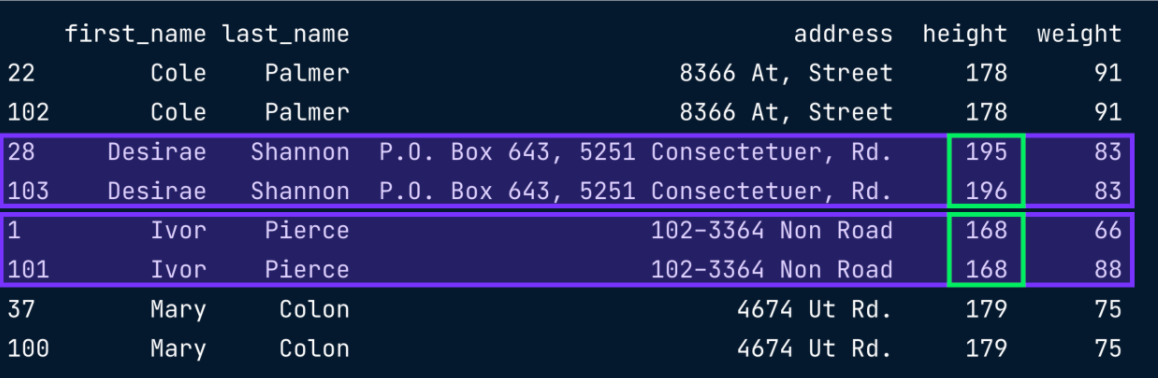






## **Dealing with complete duplicates**

* Use `.drop_duplicates()` method

## **Dealing with incomplete duplicates**

* Use `.groupby()` and `.agg()` method along with the following parameters

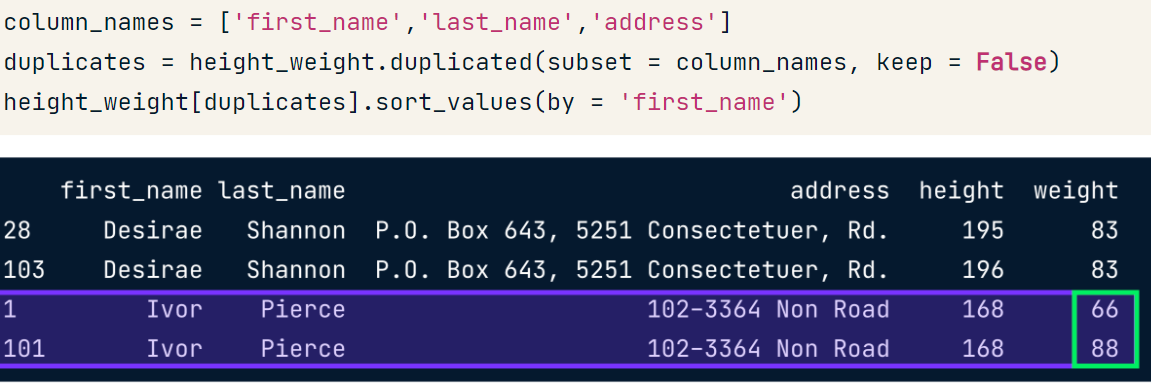

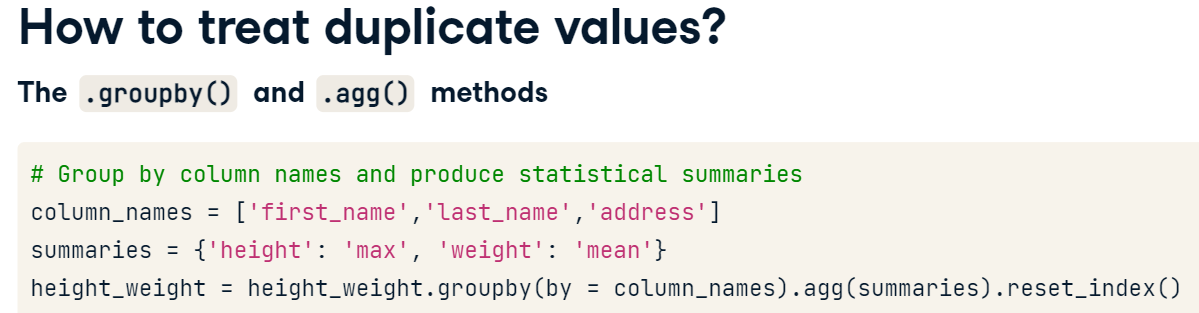

### **Finding duplicates**

A new update to the data pipeline feeding into `ride_sharing `has added the `ride_id` column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the `ride_sharing` DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. 

* Find duplicated rows of `ride_id` in the `ride_sharing` DataFrame while setting `keep` to `False`.
* Subset `ride_sharing` on duplicates and sort by `ride_id` and assign the results to `duplicated_rides`.
* Print the `ride_id`, `duration` and `user_birth_year` columns of `duplicated_rides` in that order.

In [2]:
import pandas as pd
ride_sharing = pd.read_csv("ride_sharing_small_with_ride_id.csv", index_col=[0])

# Find duplicates
duplicates = ride_sharing.duplicated(subset="ride_id", keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by='ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

    ride_id  duration  user_birth_year
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060


Notice that rides `33` and `89` are incomplete duplicates, whereas the remaining are complete. 

### **Treating duplicates**

* Drop complete duplicates in `ride_sharing` and store the results in `ride_dup`.
* Create the `statistics` dictionary which holds **min**imum aggregation for `user_birth_year` and **mean** aggregation for `duration`.
* Drop incomplete duplicates by grouping by `ride_id` and applying the aggregation in `statistics`.
* Find duplicates again and run the `assert` statement to verify de-duplication.

In [3]:
import pandas as pd
ride_sharing = pd.read_csv("ride_sharing_small_with_ride_id.csv", index_col=[0])

# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': "min", 'duration': "mean"}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset='ride_id', keep=False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

# **Categorical Constraints**

## **Inconsistencies**

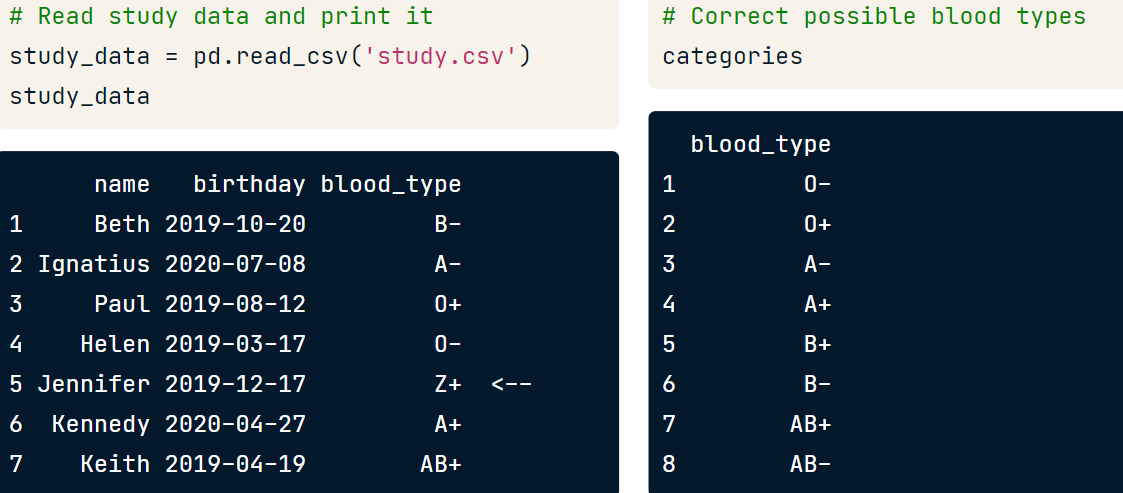

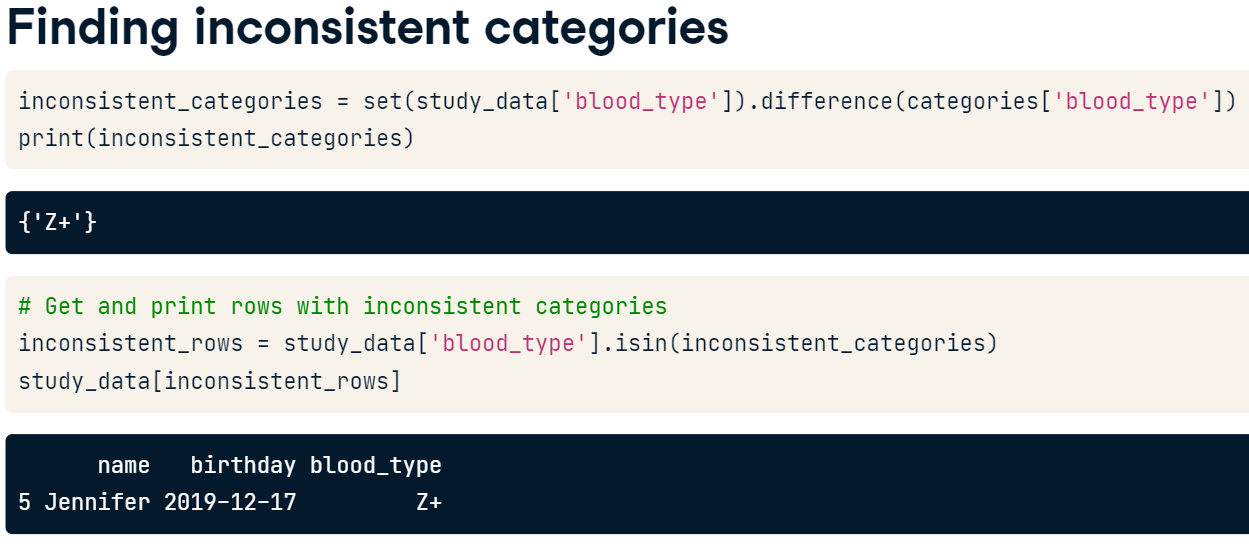

## **Dropping inconsistent categories**

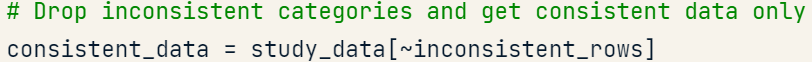

### **Finding consistency**

* Print the `categories` DataFrame and take a close look at all possible correct categories of the survey columns.
* Print the unique values of the survey columns in airlines using the `.unique()` method.

In [19]:
import pandas as pd
airlines = pd.read_csv("airlines_final.csv", index_col=[0])

# เปลี่ยนให้ข้อมูลเป็นตามโจทย์
airlines.loc[[4, 18, 100], "cleanliness"] = "Unacceptable"
cat = {'cleanliness':['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
       'safety':['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
       'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied','Very unsatisfied']}
categories = pd.DataFrame(data=cat)

# Print categories DataFrame
print(categories,"\n\n")

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines["safety"].unique(), "\n")
print('Satisfaction: ', airlines["satisfaction"].unique(), "\n")


      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied 


Cleanliness:  ['Clean' 'Average' 'Unacceptable' 'Somewhat clean' 'Somewhat dirty'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



Out of the cleanliness, safety and satisfaction columns, `cleanliness` has inconsistencies because it has an `Unacceptable` category.

* Create a set out of the `cleanliness` column in `airlines` using `set()` and find the inconsistent category by finding the **difference** in the `cleanliness` column of `categories`.
* Find rows of `airlines` with a `cleanliness` value not in `categories` and print the output.
* Print the rows with the consistent categories of `cleanliness` only.

In [22]:
import pandas as pd
pd.set_option("display.max_columns", None)
airlines = pd.read_csv("airlines_final.csv", index_col=[0])
airlines.loc[[4, 18, 100], "cleanliness"] = "Unacceptable" # เปลี่ยนให้ข้อมูลเป็นตามโจทย์
cat = {'cleanliness':['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
       'safety':['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
       'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied','Very unsatisfied']}
categories = pd.DataFrame(data=cat)

# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines["cleanliness"]).difference(set(categories["cleanliness"]))

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

       id        day           airline  destination  dest_region dest_size  \
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub   
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   

    boarding_area   dept_time  wait_min   cleanliness         safety  \
4     Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe   
18   Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe   
100   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe   

           satisfaction  
4    Somewhat satsified  
18   Somewhat satsified  
100  Somewhat satsified  
        id       day        airline        destination    dest_region  \
0     1351   Tuesday    UNITED INTL             KANSAI           Asia   
1      373    Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820  Thursday          DELTA        LOS ANGELES        West US   
3 

# **Categorical Variables**
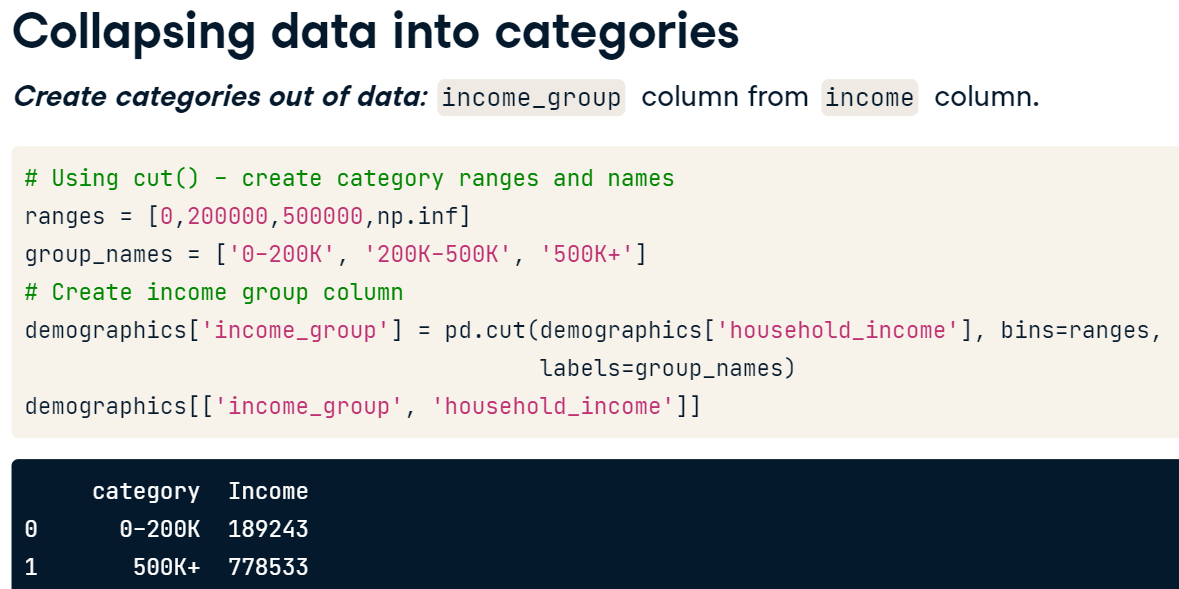

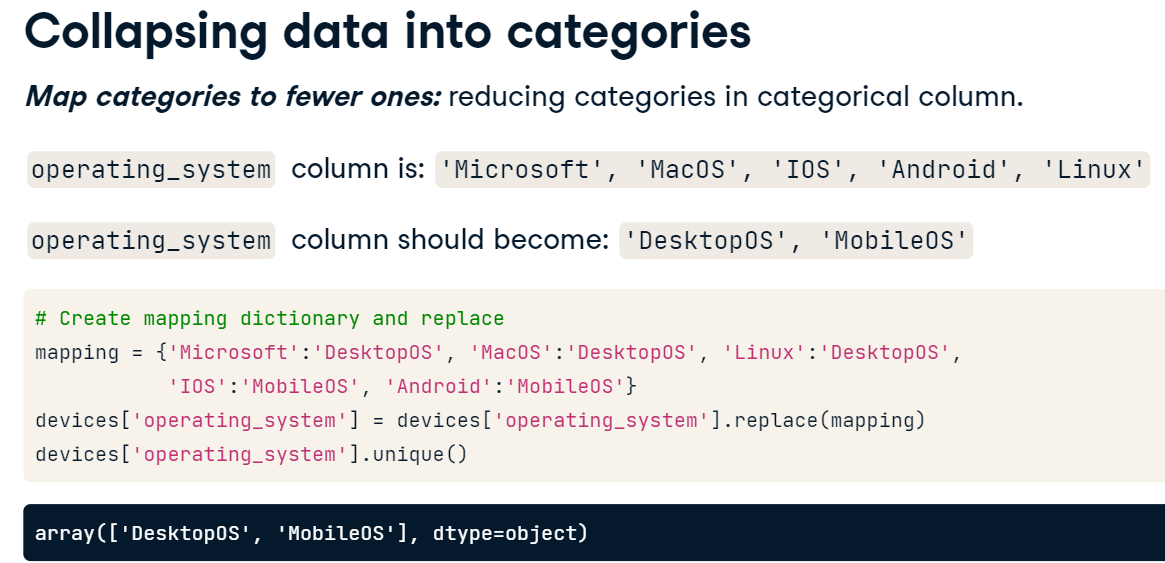





### **Inconsistent categories**

Examine two categorical columns from `airlines` dataframe, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis. 

* Print the unique values in `dest_region` and `dest_size` respectively.

In [24]:
import pandas as pd
pd.set_option("display.max_columns", None)
airlines = pd.read_csv("airlines_final.csv", index_col=[0])

# Print unique values of both columns
print(airlines['dest_region'].unique(), "\n")
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east'] 

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


* The `dest_region` column has inconsistent values due to capitalization and has one value that needs to be remapped.
* The `dest_size` column has only inconsistent values due to leading and trailing spaces.

--------------------------------------------------------------
* Change the capitalization of all values of `dest_region` to lowercase.
* Replace the `'eur'` with `'europe'` in `dest_region` using the `.replace()` method.
* Strip white spaces from the `dest_size` column using the `.strip()` method.
* Verify that the changes have been into effect by printing the unique values of the columns using `.unique()`.

In [26]:
import pandas as pd
pd.set_option("display.max_columns", None)
airlines = pd.read_csv("airlines_final.csv", index_col=[0])

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique(), "\n")
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand'] 

['Hub' 'Small' 'Medium' 'Large']


### **Remapping categories**

The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The day column contains the exact `day` a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

* `wait_type`: 
  * `'short'` for 0-60 min 
  * `'medium'` for 60-180 min 
  * `'long'` for 180+
* `day_week`: 
  * `'weekday'` if day is in the weekday, 
  * `'weekend'` if day is in the weekend.
---------------------------------------------------------------

* Create the ranges and labels for the `wait_type` column mentioned in the description above.
* Create the `wait_type` column from `wait_min` by using `pd.cut()`, while inputting `label_ranges` and `label_names` in the correct arguments.
* Create the `mapping` dictionary mapping weekdays to `'weekday'` and weekend days to `'weekend'`.
* Create the `day_week` column by using `.replace()`.

In [5]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
airlines = pd.read_csv("airlines_final.csv", index_col=[0])

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', "medium", "long"]

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines["wait_min"], bins=label_ranges, labels=label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
airlines[["day", "wait_min", "day_week", "wait_type"]].head()

,day,wait_min,day_week,wait_type
0,Tuesday,115.0,weekday,medium
1,Friday,135.0,weekday,medium
2,Thursday,70.0,weekday,medium
3,Tuesday,190.0,weekday,long
4,Wednesday,559.0,weekday,long


# **Cleaning Text Data**

## **Phone numbers**

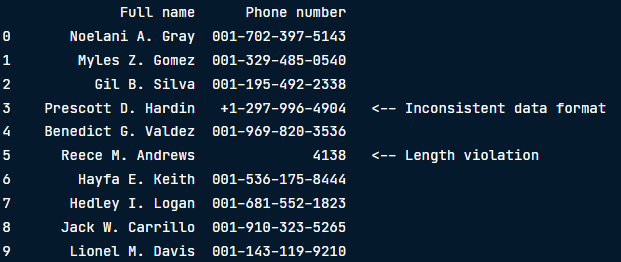

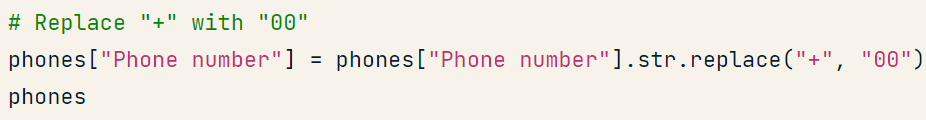

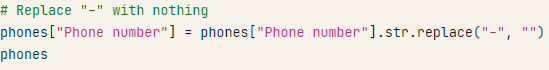

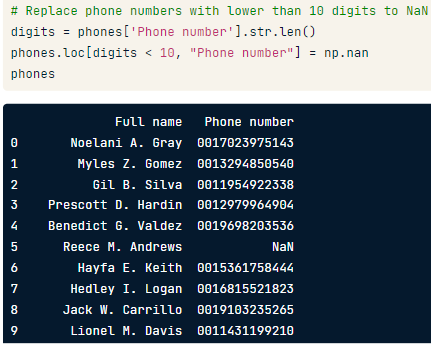




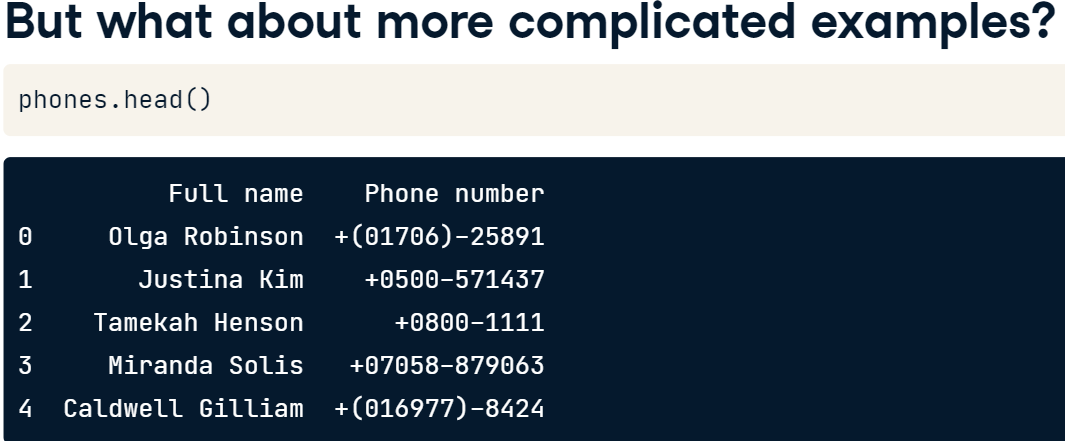

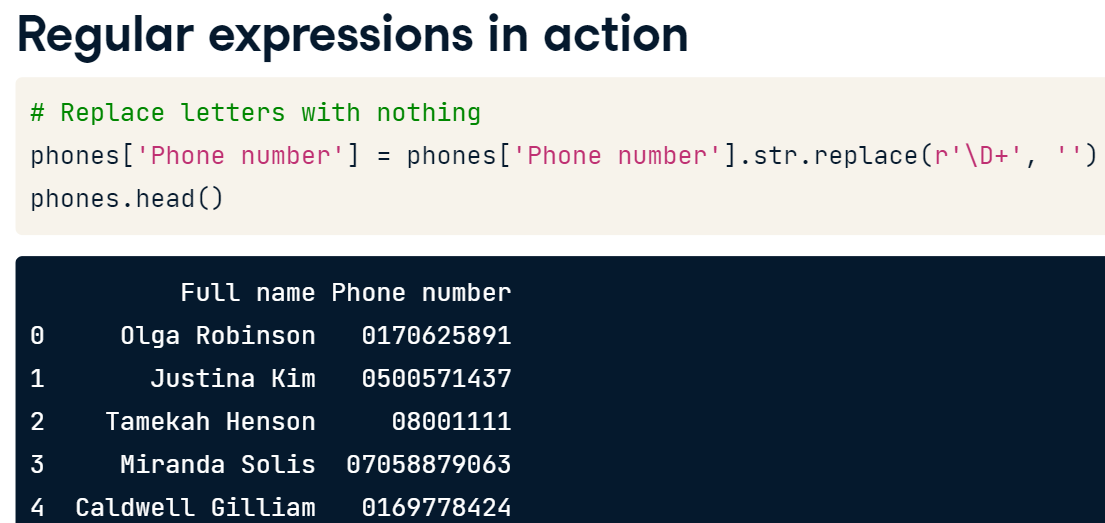



### **Removing titles and taking names**

While collecting survey respondent metadata in the `airlines` DataFrame, the full name of respondents was saved in the `full_name` column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as `"Dr."`, `"Mr."`, `"Ms."` and `"Miss"`.

You are to create two new columns named `first_name` and `last_name`, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

* Remove `"Dr."`, `"Mr."`, `"Miss"` and `"Ms."` from `full_name` by replacing them with an empty string `""` in that order.
* Run the `assert` statement using `.str.contains()` that tests whether `full_name` still contains any of the honorifics.

In [5]:
import pandas as pd
airlines = pd.read_csv("airlines_small_with_fullname.csv", index_col=[0])

# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines["full_name"].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines["full_name"].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines["full_name"].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

# Create two new columns (โจทย์ไม่ได้มีบอกให้ทำ)
airlines["full_name"] = airlines["full_name"].str.strip() 
airlines[["first_name", "last_name"]] = airlines["full_name"].str.split(" ", expand=True) # ถ้าจำนวนช่องว่างไม่เท่ากัน ใช้ r"\s+"
airlines.drop("full_name", axis=1, inplace=True)

# Reorder columns
airlines = airlines[['id', 'first_name', 'last_name', 'day', 'airline', 'destination', 'dest_region', 'dest_size', 'boarding_area', 'dept_time', 'wait_min', 'cleanliness', 'safety', 'satisfaction']]
print(airlines[["id", "first_name", "last_name", "day", 'airline', 'destination']].head())

     id first_name  last_name        day      airline        destination
0  1351    Melodie     Stuart    Tuesday  UNITED INTL             KANSAI
1   373    Dominic    Shannon     Friday       ALASKA  SAN JOSE DEL CABO
2  2820  Quintessa    Tillman   Thursday        DELTA        LOS ANGELES
3  1157  Christine  Nicholson    Tuesday    SOUTHWEST        LOS ANGELES
4  2992     Regina   Clements  Wednesday     AMERICAN              MIAMI


### **Keeping it descriptive**

* Using the `airlines` DataFrame, store the length of each instance in the `survey_response` column in `resp_length` by using `.str.len()`.
* Isolate the rows of `airlines` with `resp_length` higher than `40`.
* Assert that the smallest `survey_response` length in `airlines_survey` is now bigger than `40`.

In [19]:
import pandas as pd
airlines = pd.read_csv("airlines_final.csv", index_col=[0])

# เปลี่ยนข้อมูลให้เหมือนโจทย์
airlines = airlines.head(29)
airlines["cleanliness"], airlines["safety"], airlines["satisfaction"] = "Dirty", "Very unsafe", "Very unsatisfied"
airlines["survey_response"] = ['It was terrible', "I didn't like the flight", 'I hate this ',
       'Not a fan', 'Bad', 'Horrible', 'Very poor', 'Unacceptable flight',
       'It was awful', 'My fllight was really unpleasant',
       'I am not a fan', 'I had a bad flight', 'It was very bad',
       'it was horrible', 'Terrible', 'It was substandard',
       'I did not enjoy the flight',
       'The airport personnell forgot to alert us of delayed flights, the bathrooms could have been cleaner',
       'The food in the airport was really really expensive - also no automatic escalators!',
       'One of the other travelers was really loud and talkative and was making a scene and no one did anything about it',
       "I don't remember answering the survey with these scores, my experience was great! ",
       'The airport personnel kept ignoring my requests for directions ',
       'The chair I sat in was extremely uncomfortable, I still have back pain to this day! ',
       'I wish you were more like other airports, the flights were really disorganized! ',
       'I was really unsatisfied with the wait times before the flight. It was unacceptable.',
       "The flight was okay, but I didn't really like the number of times I had to stop at security",
       'We were really slowed down by security measures, I missed my flight because of it! ',
       'There was a spill on the aisle next to the bathroom and it took hours to clean!',
       'I felt very unsatisfied by how long the flight took to take off.']
       
# Store length of each row in survey_response column
resp_length = airlines["survey_response"].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey["survey_response"].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])


18    The airport personnell forgot to alert us of d...
19    The food in the airport was really really expe...
20    One of the other travelers was really loud and...
21    I don't remember answering the survey with the...
22    The airport personnel kept ignoring my request...
23    The chair I sat in was extremely uncomfortable...
24    I wish you were more like other airports, the ...
25    I was really unsatisfied with the wait times b...
27    The flight was okay, but I didn't really like ...
28    We were really slowed down by security measure...
29    There was a spill on the aisle next to the bat...
30    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object


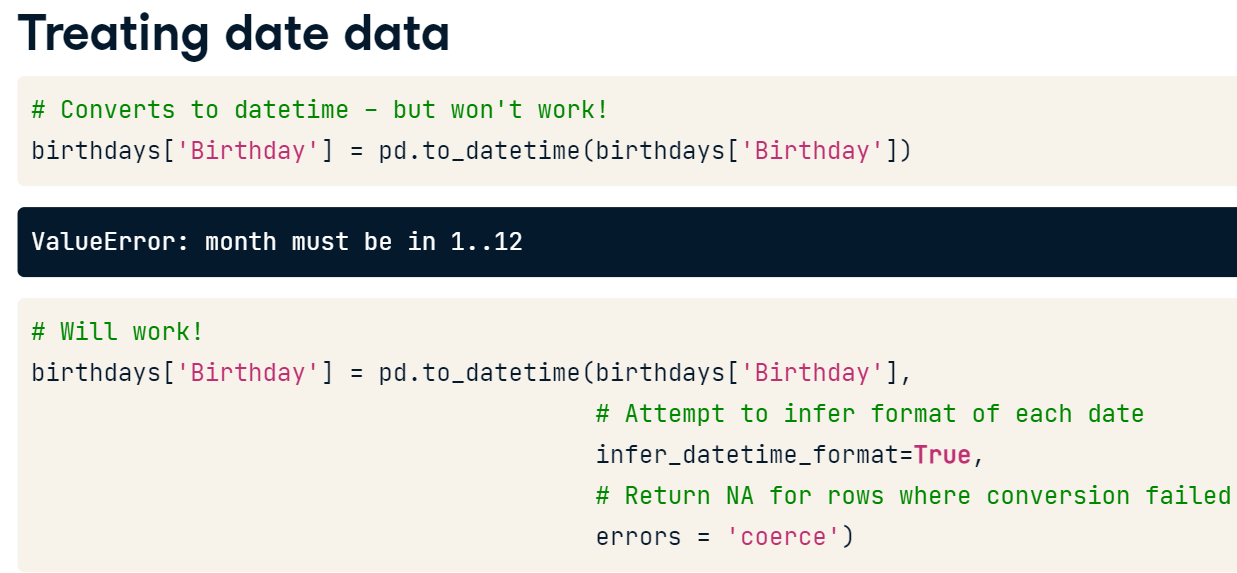

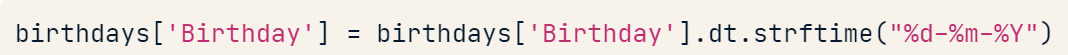

### **Uniform currencies**

The dataset contains data on the amount of money stored in accounts (`acct_amount`), their currency (`acct_cur`), amount invested (`inv_amount`), account opening date (`account_opened`), and last transaction date (`last_transaction`) that were consolidated from American and European branches.

* Find the rows of `acct_cur` in `banking` that are equal to `'euro'` and store them in the variable `acct_eu`.
* Find all the rows of `acct_amount` in `banking` that fit the `acct_eu` condition, and convert them to USD by multiplying them with `1.1`.
* Find all the rows of `acct_cur` in banking that fit the `acct_eu` condition, set them to `'dollar'`.

In [10]:
import pandas as pd
banking = pd.read_csv("banking_with_currency.csv", index_col=[0])[['cust_id', 'acct_amount', 'acct_cur', 'inv_amount', 'account_opened', 'last_transaction']]
print(banking.head(), "\n")

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

print(banking.head())

    cust_id  acct_amount acct_cur  inv_amount account_opened last_transaction
0  8C35540A     44244.71   dollar    35500.50       03-05-18         30-09-19
1  D5536652     86506.85   dollar    81921.86       21-01-18         14-01-19
2  A631984D     77799.33   dollar    46412.27       26-01-18         06-10-19
3  93F2F951     93875.24     euro    76563.35       21-08-17         10-07-19
4  DE0A0882     99998.35     euro    18669.01       05-06-17         15-01-19 

    cust_id  acct_amount acct_cur  inv_amount account_opened last_transaction
0  8C35540A    44244.710   dollar    35500.50       03-05-18         30-09-19
1  D5536652    86506.850   dollar    81921.86       21-01-18         14-01-19
2  A631984D    77799.330   dollar    46412.27       26-01-18         06-10-19
3  93F2F951   103262.764   dollar    76563.35       21-08-17         10-07-19
4  DE0A0882   109998.185   dollar    18669.01       05-06-17         15-01-19


### **Uniform dates**

 The `account_opened` column represents when customers opened their accounts. You need to make sure that all dates are of the same format. You will do so by converting this column into a `datetime` object, while making sure that the format is inferred and potentially incorrect formats are set to missing.

* Print the header of `account_opened` from the banking DataFrame and take a look at the different results. 



In [15]:
import pandas as pd
banking = pd.read_csv("banking_with_currency.csv", index_col=[0])[['cust_id', 'acct_amount', 'acct_cur', 'inv_amount', 'account_opened', 'last_transaction']]
acct_eu = banking['acct_cur'] == 'euro'
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# เปลี่ยนวันที่ ให้เหมือนโจทย์
banking["account_opened"] = ['2018-03-05', '21-01-18', 'January 26, 2018', '21-14-17',
       '05-06-17', '26-12-17', '21-06-18', '07-10-17', '02-09-18',
       '28-02-19', '15-06-18', '03-01-19', '03-02-18', '15-08-18',
       '04-06-17', '26-05-18', '14-12-18', '03-09-18', '10-08-18',
       '23-02-19', '02-05-18', '04-05-17', '14-05-18', '16-05-17',
       '29-01-19', '03-04-18', '04-02-19', '03-01-19', '28-02-18',
       '29-12-18', '05-12-17', '29-07-18', '09-10-18', '30-10-18',
       '12-03-18', '28-01-19', '13-11-17', '23-07-18', '18-07-17',
       '20-04-18', '09-10-17', '22-01-18', '08-06-17', '17-09-18',
       '03-04-17', '09-08-18', '23-05-18', '18-10-18', '17-03-17',
       '30-12-18', '18-08-18', '02-07-17', '27-04-18', '07-11-17',
       '06-02-18', '28-09-18', '28-04-18', '08-03-18', '18-10-18',
       '25-02-18', '17-09-18', '09-06-18', '28-11-17', '09-05-18',
       '26-02-19', '29-05-18', '25-04-18', '15-12-18', '30-08-18',
       '16-08-17', '27-12-18', '16-09-17', '01-08-17', '08-06-17',
       '27-10-18', '04-06-17', '05-02-18', '06-05-18', '20-03-18',
       '22-05-17', '30-12-18', '17-11-17', '14-04-17', '20-04-17',
       '08-08-18', '19-05-18', '24-12-17', '07-11-17', '16-11-17',
       '08-12-18', '09-02-19', '10-04-18', '26-11-17', '14-07-18',
       '02-06-18', '28-05-17', '23-10-17']

# Print the header of account_opened
print(banking["account_opened"].head())
pd.to_datetime(banking["account_opened"])


0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object


ParserError: ignored

You tried converting the values to datetime using the default `to_datetime()` function without changing any argument, however received the above error.  This is because the `21-14-17` entry is erroneous and leads to an error.

* Convert the `account_opened` column to `datetime`, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.
* Extract the year from the amended `account_opened` column and assign it to the `acct_year` column.
* Print the newly created `acct_year` column.

In [16]:
import pandas as pd
banking = pd.read_csv("banking_with_currency.csv", index_col=[0])[['cust_id', 'acct_amount', 'acct_cur', 'inv_amount', 'account_opened', 'last_transaction']]
acct_eu = banking['acct_cur'] == 'euro'
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# เปลี่ยนวันที่ ให้เหมือนโจทย์
banking["account_opened"] = ['2018-03-05', '21-01-18', 'January 26, 2018', '21-14-17',
       '05-06-17', '26-12-17', '21-06-18', '07-10-17', '02-09-18',
       '28-02-19', '15-06-18', '03-01-19', '03-02-18', '15-08-18',
       '04-06-17', '26-05-18', '14-12-18', '03-09-18', '10-08-18',
       '23-02-19', '02-05-18', '04-05-17', '14-05-18', '16-05-17',
       '29-01-19', '03-04-18', '04-02-19', '03-01-19', '28-02-18',
       '29-12-18', '05-12-17', '29-07-18', '09-10-18', '30-10-18',
       '12-03-18', '28-01-19', '13-11-17', '23-07-18', '18-07-17',
       '20-04-18', '09-10-17', '22-01-18', '08-06-17', '17-09-18',
       '03-04-17', '09-08-18', '23-05-18', '18-10-18', '17-03-17',
       '30-12-18', '18-08-18', '02-07-17', '27-04-18', '07-11-17',
       '06-02-18', '28-09-18', '28-04-18', '08-03-18', '18-10-18',
       '25-02-18', '17-09-18', '09-06-18', '28-11-17', '09-05-18',
       '26-02-19', '29-05-18', '25-04-18', '15-12-18', '30-08-18',
       '16-08-17', '27-12-18', '16-09-17', '01-08-17', '08-06-17',
       '27-10-18', '04-06-17', '05-02-18', '06-05-18', '20-03-18',
       '22-05-17', '30-12-18', '17-11-17', '14-04-17', '20-04-17',
       '08-08-18', '19-05-18', '24-12-17', '07-11-17', '16-11-17',
       '08-12-18', '09-02-19', '10-04-18', '26-11-17', '14-07-18',
       '02-06-18', '28-05-17', '23-10-17']

# Print the header of account_opend
print(banking['account_opened'].head(), "\n")

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format=True,
                                           # Return missing value for error
                                           errors='coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'].head())

0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object 

0    2018
1    2018
2    2018
3     NaN
4    2017
Name: acct_year, dtype: object


Now that the `acct_year` column is created, a simple `.groupby()` will show you how accounts are opened on a yearly.

# **Cross field validation**

The use of multiple columns to inspect whether data are consistent across dataframe.

In an example below, it performs a check for total passengers must equal every passengers from all other parts.

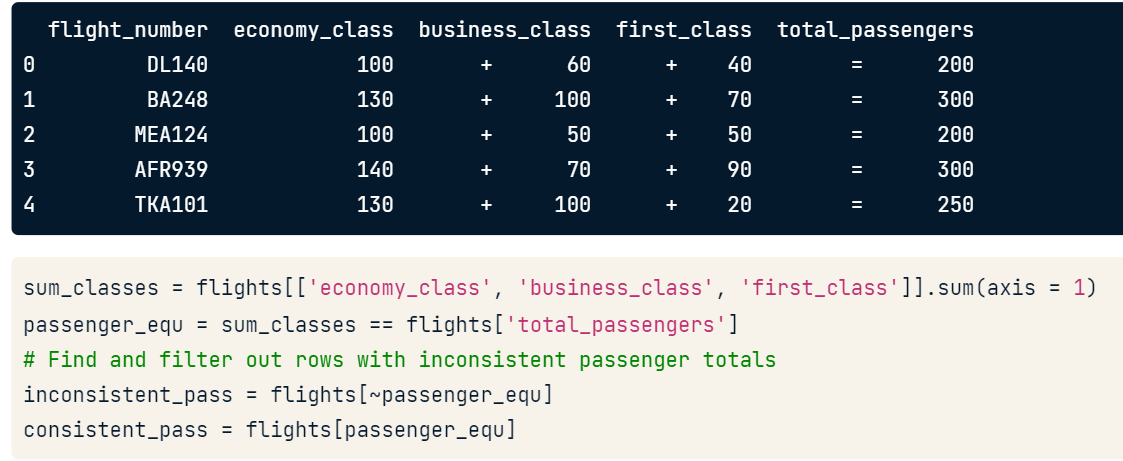

To check whether the age is correct by substracting the date when data were collected with the birthdatae in each row.  Example below uses today instead of date when data were collected for simplicity.

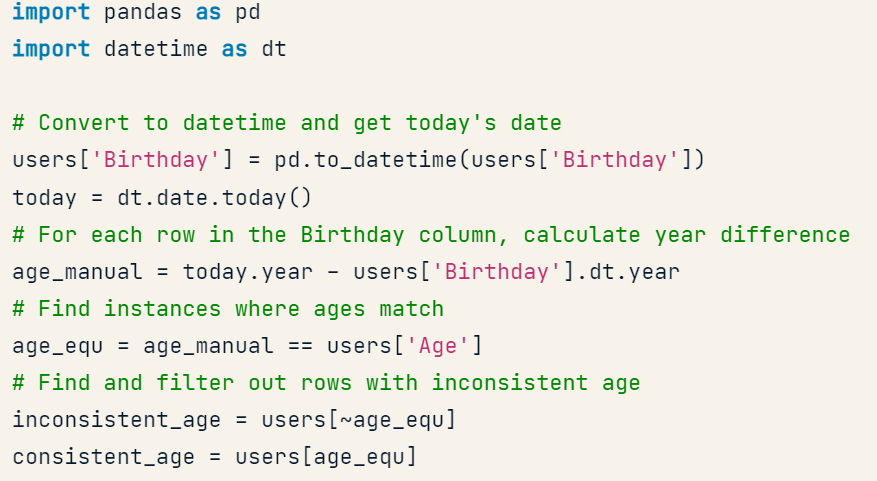

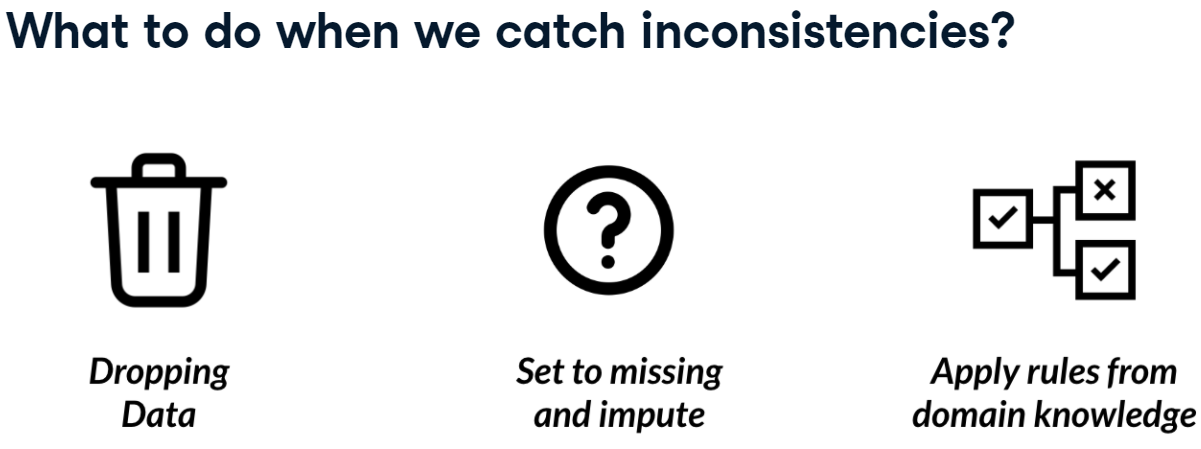



### **How's our data integrity?**

You want to understand how customers of different age groups invest. You will do so by cross field checking values of `inv_amount` and `age` against the amount invested in different funds and customers' birthdays. 

* Find the rows where the sum of all rows of the fund_columns in `banking` are equal to the `inv_amount` column.
* Store the values of `banking` with consistent `inv_amount` in `consistent_inv`, and those with inconsistent ones in `inconsistent_inv`.

In [7]:
import pandas as pd
banking = pd.read_csv("banking_dirty.csv", index_col=[0])

# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking["inv_amount"]

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])



Number of inconsistent investments:  8


* Store today's date into `today`, and manually calculate customers' ages and store them in `ages_manual`.
* Find all rows of `banking` where the age column is equal to `ages_manual` and then filter `banking` into `consistent_ages` and `inconsistent_ages`.

In [22]:
import pandas as pd
import datetime as dt
banking = pd.read_csv("banking_dirty.csv", index_col=[0])
banking["birth_date"] = pd.to_datetime(banking["birth_date"])

# ไม่ตรงตามไฟล์ที่ให้ดาวน์โหลด
banking["Age"] = [59, 59, 31, 36, 37, 41, 50, 58, 46, 56, 39, 55, 37, 46, 43, 50, 43,
       38, 56, 28, 59, 59, 29, 53, 29, 37, 29, 40, 32, 32, 54, 34, 60, 40,
       35, 28, 37, 59, 32, 49, 48, 47, 38, 51, 29, 46, 32, 59, 58, 60, 42,
       50, 43, 29, 33, 30, 49, 47, 51, 53, 49, 46, 30, 46, 39, 55, 38, 31,
       54, 29, 33, 52, 49, 47, 34, 47, 45, 41, 47, 49, 51, 30, 48, 58, 48,
       47, 47, 53, 54, 53, 37, 47, 31, 58, 60, 47, 32, 37, 52, 28]

# Store today's date and find ages
today = dt.date.today() 
ages_manual = today.year - banking["birth_date"].dt.year 
# คนทำคอร์ส น่าจะแอบมาปรับคอลัมน์ age เพราะในไฟล์ข้อมูล ไม่ตรงกัน ณ ปี 2021

# Find rows where age column == ages_manual
age_equ = banking["Age"] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  4


There are only 8 and 4 rows affected by inconsistent `inv_amount` and `age` values, respectively. In this case, it's best to investigate the underlying data sources before deciding on a course of action!

# **Missing Values**

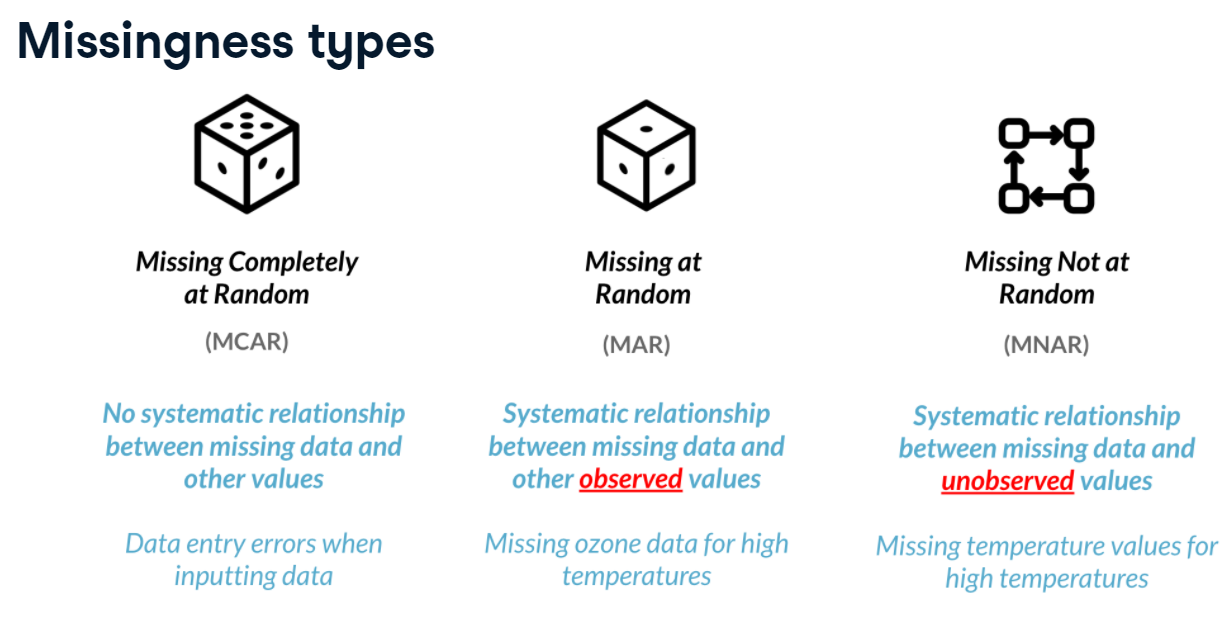



### **Missing investors**

You know for a fact that most customers below `25` do not have investment accounts yet, and suspect it could be driving the missingness.

* Print the number of missing values by column in the `banking` DataFrame.
* Plot and show the missingness `matrix` of banking with the `msno.matrix()` function.
* Isolate the values of `banking` missing values of `inv_amount` into `missing_investors` and with non-missing `inv_amount` values into `investors`.

cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64


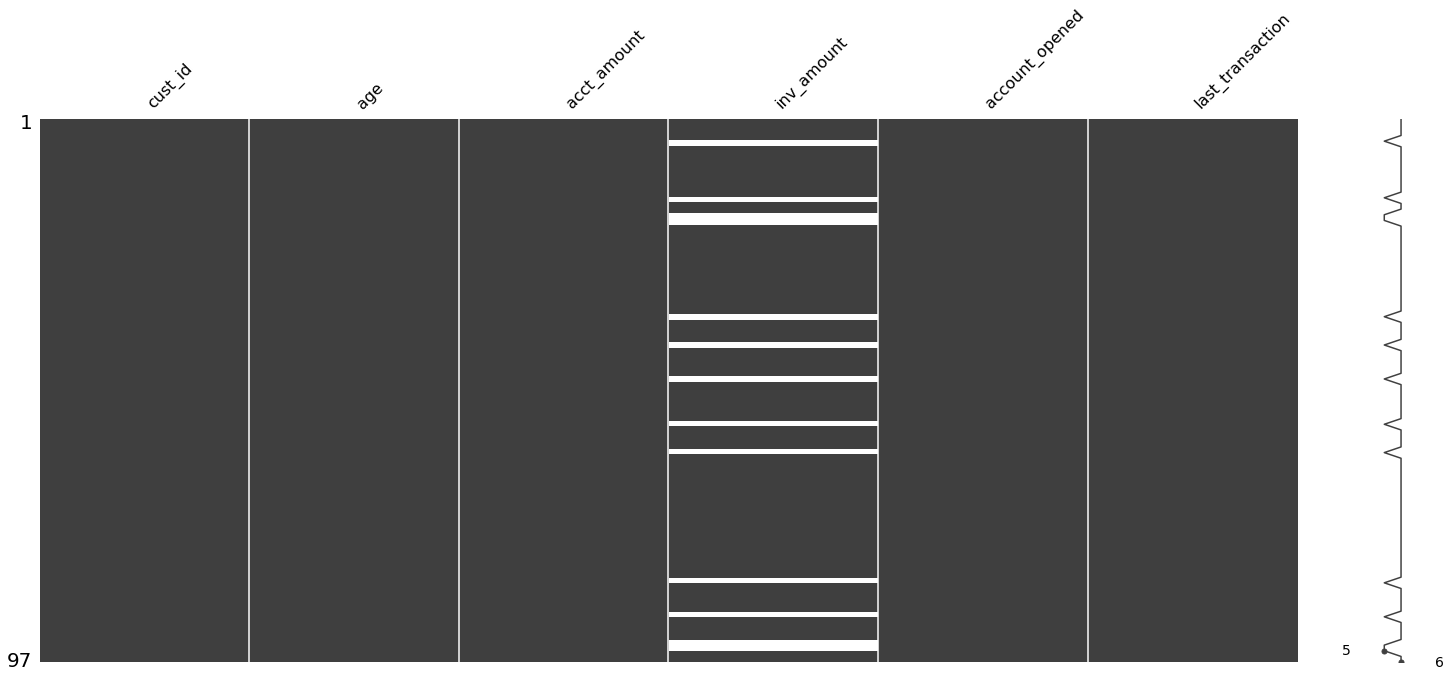

             age   acct_amount  inv_amount
count  13.000000     13.000000         0.0
mean   21.846154  73231.238462         NaN
std     1.519109  25553.327176         NaN
min    20.000000  21942.370000         NaN
25%    21.000000  66947.300000         NaN
50%    21.000000  86028.480000         NaN
75%    23.000000  89855.980000         NaN
max    25.000000  99998.350000         NaN 

              age    acct_amount    inv_amount
count  84.000000      84.000000     84.000000
mean   43.559524   75095.273214  44717.885476
std    10.411244   32414.506022  26031.246094
min    26.000000   12209.840000   3216.720000
25%    34.000000   57373.062500  22736.037500
50%    45.000000   83061.845000  44498.460000
75%    53.000000   94165.965000  66176.802500
max    59.000000  250046.760000  93552.690000


In [25]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

banking = pd.read_csv("banking_with_missing.csv", index_col=[0])

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking["inv_amount"].isna()]
investors = banking[~banking["inv_amount"].isna()]

print(missing_investors.describe(), "\n\n", investors.describe())

The `inv_amount` is missing only for young customers, since the average age in missing_investors is `21.846154` and the maximum age is `25`.

* Sort the `banking` DataFrame by the `age` column and plot the missingness matrix of `banking_sorted`.

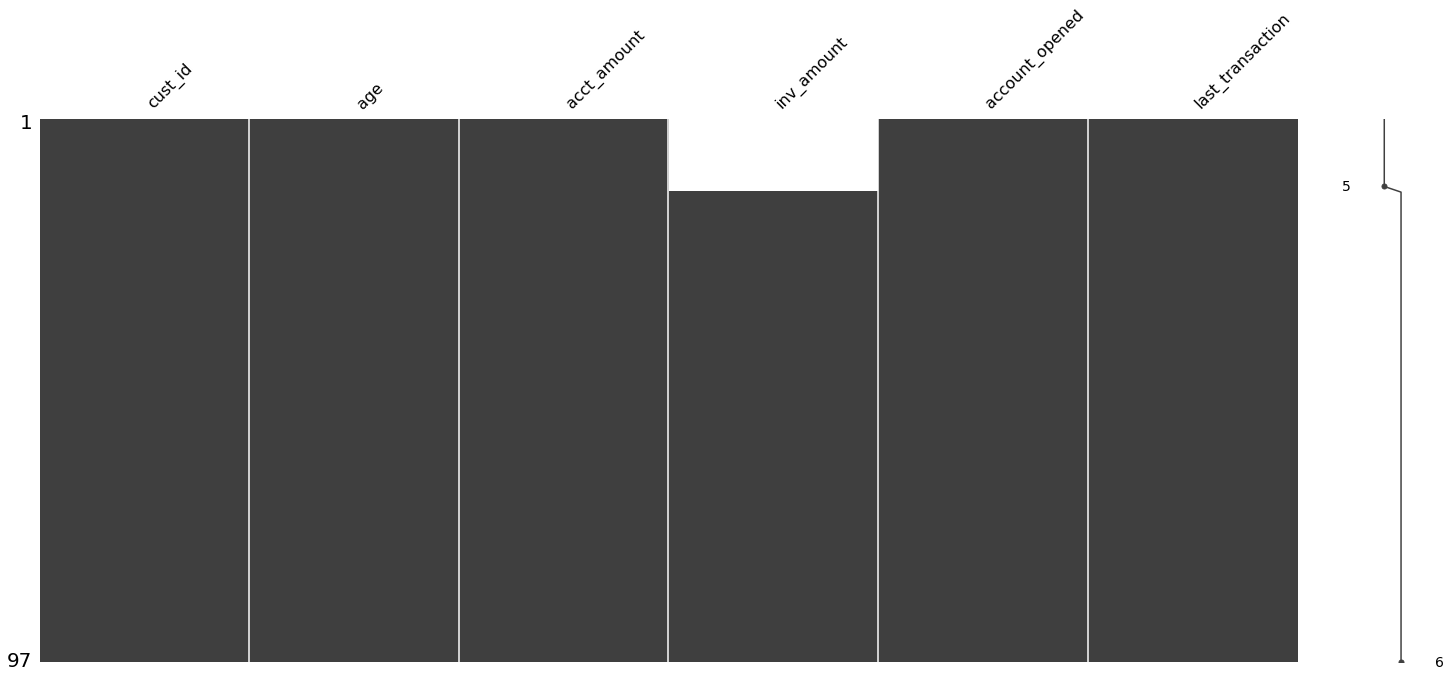

In [26]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

banking = pd.read_csv("banking_with_missing.csv", index_col=[0])

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by="age")
msno.matrix(banking_sorted)
plt.show()

Notice how all the white spaces for inv_amount are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to `0` with `.fillna()`.

### **Follow the money**

You're working with another version of the `banking` DataFrame that contains missing values for both the `cust_id` column and the `acct_amount` column.

You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually `5` times the amount of `inv_amount`.

You will drop rows of banking with missing `cust_ids`, and impute missing values of `acct_amount` with some domain knowledge.

* Use `.dropna()` to drop missing values of the `cust_id` column in banking and store the results in `banking_fullid`.
* Use `inv_amount` to compute the estimated account amounts for `banking_fullid` by setting the amounts equal to `inv_amount * 5`, and assign the results to `acct_imp`.
* Impute the missing values of `acct_amount` in `banking_fullid` with the newly created `acct_imp` using `.fillna()`.

In [30]:
import pandas as pd
banking = pd.read_csv("banking_with_missing_cust_id_and_acct_amount.csv", index_col=[0])
print(banking.isnull().sum(), "\n\n")

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset=["cust_id"])

# Compute estimated acct_amount
acct_imp = banking_fullid["inv_amount"]*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id              9
acct_amount         14
inv_amount           0
account_opened       0
last_transaction     0
dtype: int64 


cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64


In [2]:
!pip install fuzzywuzzy

In [4]:
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149865 sha256=0242b8ca4c47aa706772921d4a41d65e7f254acf2df1d3d20670b972c948b2ad
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


# **String Comparison**

* Use a package called `fuzzywuzzy`
* Use `fuzz.WRatio("string_1", "string_2")` to compare similarities.  For example below, the closer to 100, the more resemblance.

In [8]:
from fuzzywuzzy import fuzz

print(fuzz.WRatio("Reeding", "Reading"))
print(fuzz.WRatio("Houston Rockets", "Rockets"))

86
90


## **Compare array of strings**


In [10]:
from fuzzywuzzy import process
import pandas as pd

string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(["Rocket vs Lakers", "Lakers vs Rockets", "Houston vs Los Angeles", "Heat vs Bulls"])

process.extract(string, choices, limit=2)


[('Rocket vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]

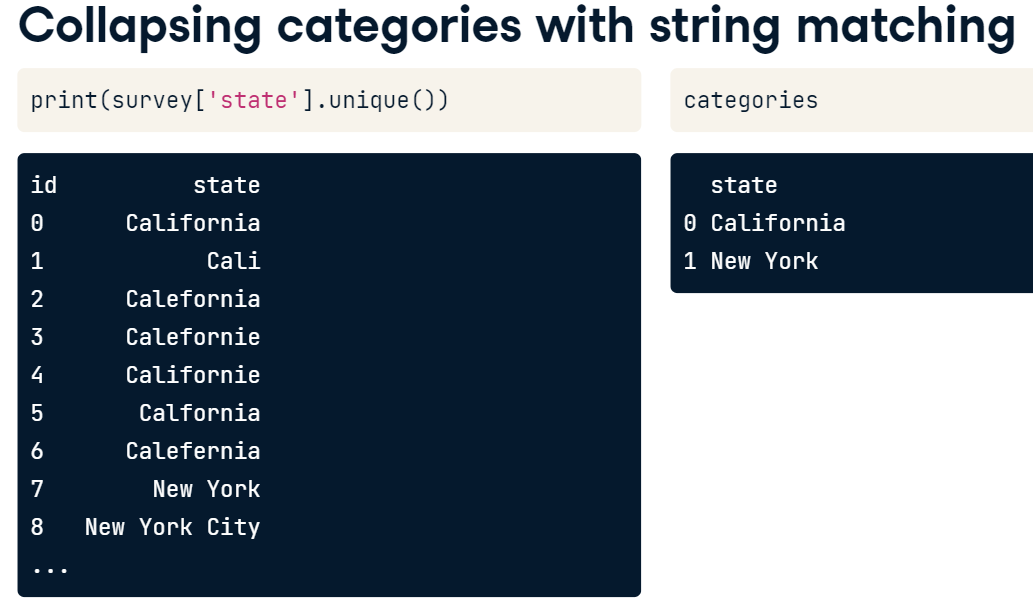

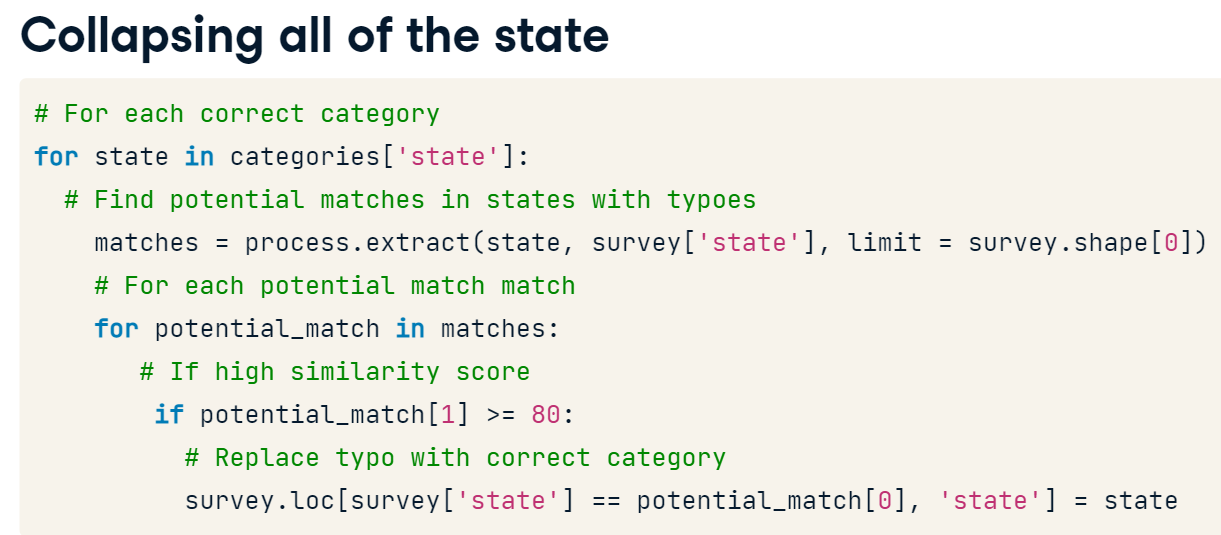



### **The cutoff point**

`restaurants` dataframe has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and `asian` cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the `fuzzywuzzy`'s `process.extract()` function by finding the similarity score of the most distant typo of each category.

* Import `process` from `fuzzywuzzy`.
* Store the unique `cuisine_types` into `unique_types`.
* Calculate the similarity of `'asian'`, `'american'`, and `'italian'` to all possible cuisine_types using `process.extract()`, while returning all possible matches.

In [18]:
import pandas as pd
from fuzzywuzzy import process
restaurants = pd.read_csv("restaurants.csv", index_col=[0])

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants["cuisine_type"].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit=len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit=len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit=len(unique_types)))




[('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('amurican', 62), ('american', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('americann', 57), ('americano', 57), ('ameerican', 57), ('aamerican', 57), ('ameriican', 57), ('amerrican', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]
[('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('italian', 53), (

### **Remapping categories II**

Above, the distance cutoff point for remapping typos of `'american'`, `'asian'`, and `'italian'` cuisine types stored in the `cuisine_type` column should be `80`.

You are to find matches with similarity scores equal to or higher than `80` by using `fuzywuzzy.process`'s `extract()` function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using `process.extract()`, the output is a list of tuples where each is formatted like:

`(closest match, similarity score, index of match)`

* Return all of the unique values in the `cuisine_type` column of restaurants.

In [21]:
import pandas as pd
restaurants = pd.read_csv("restaurants.csv", index_col=[0])

# Inspect the unique values of the cuisine_type column
print(restaurants["cuisine_type"].unique())



['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
 'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
 'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
 'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
 'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
 'itallian']


*  Create a list of all possible `matches`, comparing `'italian'` with the restaurant types listed in the `cuisine_type` column.

In [22]:
import pandas as pd
from fuzzywuzzy import process
restaurants = pd.read_csv("restaurants.csv", index_col=[0])
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract("italian", restaurants["cuisine_type"], limit=restaurants.shape[0])

# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 11), ('italian', 100, 24), ('italian', 100, 37), ('italian', 100, 43), ('italian', 100, 44)]


* Within the `for` loop, use an `if` statement to check whether the similarity score in each `match` is greater than or equal to `80`.
* If it is, use `.loc` to select rows where `cuisine_type` in `restaurants` is equal to the current match (which is the first element of `match`), and reassign them to be `'italian'`.

In [23]:
import pandas as pd
from fuzzywuzzy import process
restaurants = pd.read_csv("restaurants.csv", index_col=[0])

# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

# Iterate through the list of matches to italian
for match in matches:
    # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
        # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
        restaurants.loc[restaurants["cuisine_type"]==match[0], "cuisine_type"] = 'italian'

* Using the variable `cuisine` to iterate through `categories`, embed your code from the previous step in an outer `for` loop.

In [32]:
import pandas as pd
from fuzzywuzzy import process
restaurants = pd.read_csv("restaurants.csv", index_col=[0])
categories = ['italian', 'asian', 'american']

#Before modification
print(restaurants["cuisine_type"].unique(),"\n\n")

# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
print("After modification:\n", restaurants['cuisine_type'].unique())

['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
 'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
 'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
 'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
 'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
 'itallian'] 


After modification:
 ['american' 'asian' 'italian']


In [34]:
!pip install recordlinkage

     |████████████████████████████████| 944 kB 5.2 MB/s 
     |████████████████████████████████| 134 kB 60.6 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.8.8-cp37-cp37m-linux_x86_64.whl size=73202 sha256=bd0e417e47f1bf5450acca6db7306bd46aadced75f0204c6e1c75ed466c7de33
  Stored in directory: /root/.cache/pip/wheels/82/aa/f4/716387e1f167cbbf911488aa056138152f4d8699c9c9b43ea8
Successfully built jellyfish


# **Generating Pairs**

Unlike joins, `recordlinkage` does not require exact matches between different pairs of data, and instead can find close matches using string similarity. This is why `recordlinkage` is effective when there are no common unique keys between the data sources.

In [ ]:
import recordlinkage

# Create indexing object
indexer = recordlinkage.Index()

# Generate pair blocks on column of interest
indexer.block("col_name")
pairs = indexer.index(df1, df2)

# Create a Compare object
compare_cl = recordlinkage.Compare()

# Find exact matches for pairs
compare_cl.exact("col_name", "col_name", label="col_name")

# Find similar matches (not exact) for fuzzying columns
compare_cl.string("fuzzy_col", "fuzzy_col", threshold=0.85, label="fuzzy_col")

# Find matches
potential_matches = compare_cl.compute(pairs, df1, df2)

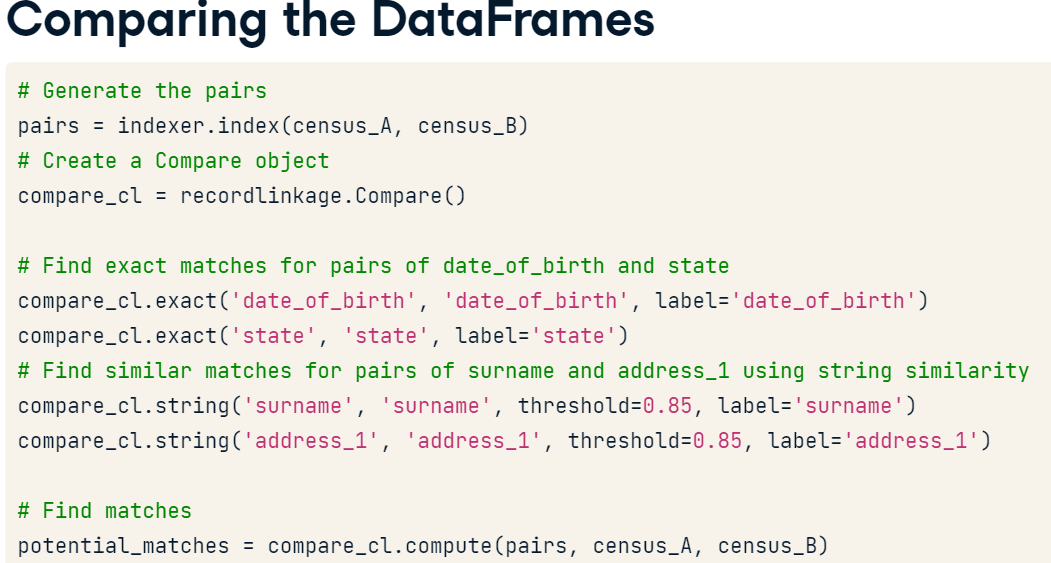

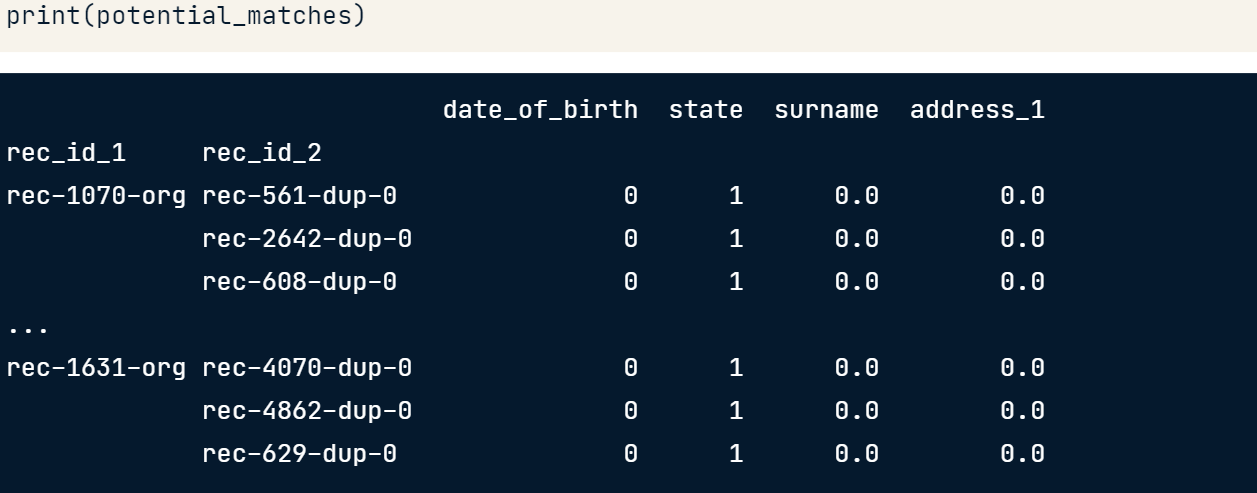

To find potential matches we filter for rows where the sum of row values is higher than a certain threshold.

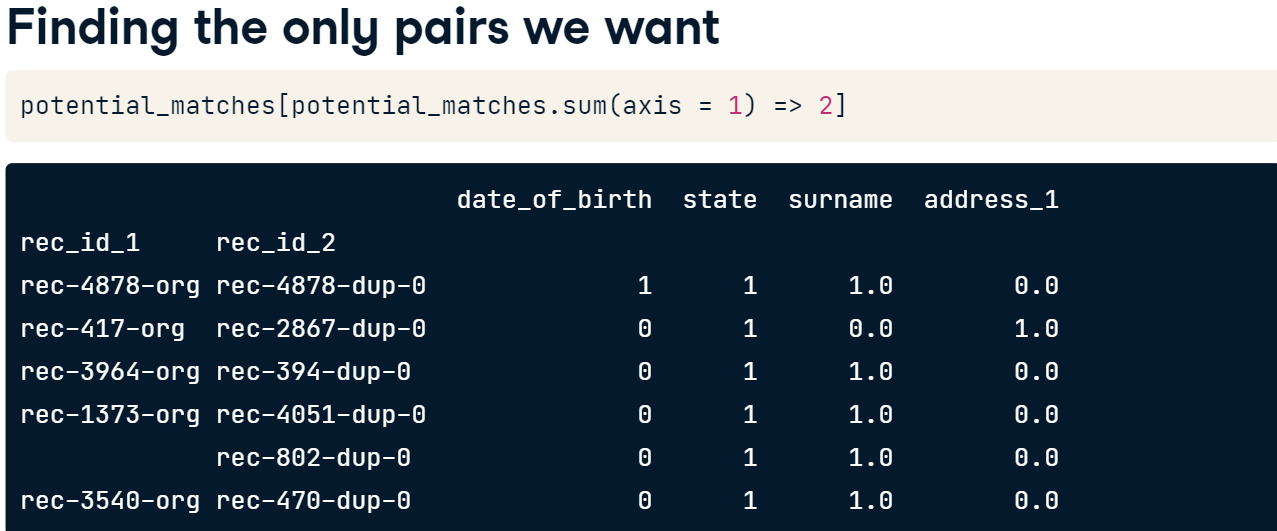

### **Pairs of restaurants**

There are duplicates with typos in restaurants names that require record linkage instead of joins.

* Instantiate an indexing object by using the `Index()` function from `recordlinkage`.
* Block your pairing on `cuisine_type` by using `indexer`'s' .`block()` method.
* Generate pairs by indexing `restaurants` and `restaurants_new` in that order.

In [49]:
import pandas as pd
import recordlinkage

restaurants = pd.read_csv("restaurants_L2.csv", index_col=[0])
restaurants_new = pd.read_csv("restaurants_L2_dirty.csv", index_col=[0])
restaurants.columns = ["rest_name", "rest_addr", "city", "phone", "cuisine_type"]
restaurants_new.columns = ["rest_name", "rest_addr", "city", "phone", "cuisine_type"]

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block("cuisine_type")

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

### **Similar restaurants**

When performing `recordlinkage`, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in `pairs`, you will find exact matches in the `city` and `cuisine_type` columns between each pair, and similar strings for each pair in the `rest_name` column.

* Instantiate a comparison object using the `recordlinkage.Compare()` function.
* Use the appropriate `comp_cl` method to find exact matches between the `city` and `cuisine_type` columns of both DataFrames.
* Use the appropriate `comp_cl` method to find similar strings with a `0.8` similarity threshold in the `rest_name` column of both DataFrames.
* Compute the comparison of the pairs by using the `.compute()` method of `comp_cl`.

In [54]:
import pandas as pd
import recordlinkage

restaurants = pd.read_csv("restaurants_L2.csv", index_col=[0])
restaurants_new = pd.read_csv("restaurants_L2_dirty.csv", index_col=[0])
restaurants.columns = ["rest_name", "rest_addr", "city", "phone", "cuisine_type"]
restaurants_new.columns = ["rest_name", "rest_addr", "city", "phone", "cuisine_type"]
indexer = recordlinkage.Index()
indexer.block("cuisine_type")
pairs = indexer.index(restaurants, restaurants_new)

# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold=0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches.head(30), "\n\n")
print(potential_matches[potential_matches.sum(axis=1) >= 3])

      city  cuisine_type  name
0 0      0             1   0.0
  1      0             1   0.0
  7      0             1   0.0
  12     0             1   0.0
  13     0             1   0.0
  20     0             1   0.0
  27     0             1   0.0
  28     0             1   0.0
  39     0             1   0.0
  40     1             1   1.0
  43     1             1   0.0
  49     0             1   0.0
  50     1             1   0.0
  51     0             1   0.0
  53     1             1   0.0
  54     0             1   0.0
  61     0             1   0.0
  67     0             1   0.0
  74     1             1   0.0
  81     0             1   0.0
1 0      0             1   0.0
  1      0             1   0.0
  7      0             1   0.0
  12     0             1   0.0
  13     0             1   0.0
  20     0             1   0.0
  27     0             1   0.0
  28     1             1   1.0
  39     0             1   0.0
  40     0             1   0.0 


       city  cuisine_type  name
0  4

* You want the above to have threshold = 3 since `city` and `cuisine_type` were exact matches and `name`s were similar matches.

* ตัวที่มัน match หมายความว่า มันน่าจะเป็นค่า duplicates นะ !!

* ก่อนจะเอา ตาราง มาต่อกัน ต้องจัดการแถวที่คาดว่าน่าจะเป็น duplicates ออกไปก่อน

# **Linking DataFrames**

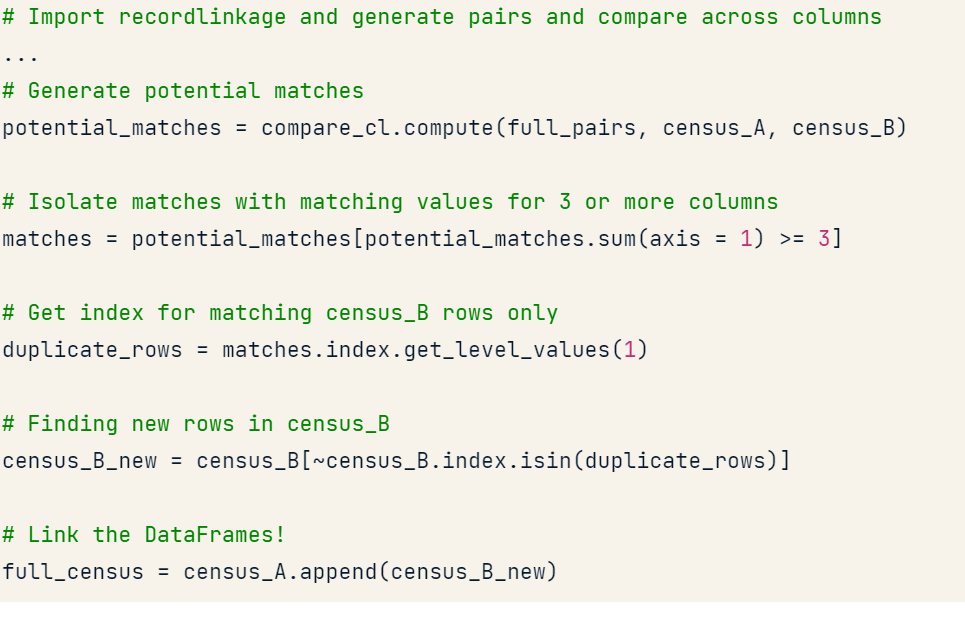

### **Linking them together!**

To link both DataFrames, you will do so by first extracting all row indices of `restaurants_new` that are matching across the columns `"cuisine_type"`, `"city"`, and `"rest_name"` from `potential_matches`. Then you will subset `restaurants_new` on these indices, then append the non-duplicate values to `restaurants`. 

* Isolate instances of `potential_matches` where the row sum is above or equal to `3` by using the `.sum()` method.
* Extract the second column index from `matches`, which represents row indices of matching record from `restaurants_new` by using the `.get_level_values()` method.
* Subset `restaurants_new` for rows that are not in `matching_indices`.
* Append `non_dup` to `restaurants`.

In [59]:
import pandas as pd
import recordlinkage
pd.set_option("display.max_rows", None)

restaurants = pd.read_csv("restaurants_L2.csv", index_col=[0])
restaurants_new = pd.read_csv("restaurants_L2_dirty.csv", index_col=[0])
restaurants.columns = ["rest_name", "rest_addr", "city", "phone", "cuisine_type"]
restaurants_new.columns = ["rest_name", "rest_addr", "city", "phone", "cuisine_type"]
indexer = recordlinkage.Index()
indexer.block("cuisine_type")
pairs = indexer.index(restaurants, restaurants_new)
comp_cl = recordlinkage.Compare()
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')
comp_cl.string('rest_name', 'rest_name', label='name', threshold=0.8) 
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)

# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis=1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup).reset_index(drop=True)
print(full_restaurants)

                                         rest_name  \
0                        arnie morton's of chicago   
1                               art's delicatessen   
2                                        campanile   
3                                            fenix   
4                               grill on the alley   
5                                 restaurant katsu   
6                                   locanda veneta   
7                                        matsuhisa   
8                                         the palm   
9                          philippe's the original   
10                               rex il ristorante   
11                                       valentino   
12           yujean kang's gourmet chinese cuisine   
13                                         21 club   
14                                         aureole   
15                                       cafe lalo   
16                                       carmine's   
17                          